<a href="https://colab.research.google.com/github/kdmwangi/CODSOFT/blob/main/Titanic_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Model

<img src="https://esq.h-cdn.co/assets/16/16/1600x798/gallery-1460987104-titanic.JPG"/>

# **Import Statements**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

# **Data Exploration and Cleaning**

In [10]:
titanic_df = pd.read_csv('Titanic-Dataset.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# shape of the dataset
titanic_df.shape
print(f'has the shape {titanic_df.shape} with {titanic_df.shape[0]} rows and {titanic_df.shape[1]} columns')

has the shape (891, 12) with 891 rows and 12 columns


In [13]:
# the data type of the columns
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
# oldest and youngset passenger
print(f'youngest was {int(titanic_df["Age"].min() * 12)} months and the oldest was {int(titanic_df["Age"].max())} years')

youngest was 5 months and the oldest was 80 years


In [15]:
# average age of passengers
print(f'Average age of {int(titanic_df["Age"].mean())} years')

Average age of 29 years


In [16]:
# average fare
print(f'$ {int(titanic_df["Fare"].mean())} dollars')

$ 32 dollars


In [17]:
# check if there are duplicate values in the dataset
print(f'{titanic_df.duplicated().any()}')

False


In [18]:
# number of passengers
print(f'{titanic_df["PassengerId"].count()} passengers')

891 passengers


In [19]:
# null values and columns in the dataset

for col in titanic_df.columns:
  if titanic_df[f'{col}'].isna().any():
    print(f'{col} has {titanic_df[f"{col}"].isna().sum()} NaN values')

Age has 177 NaN values
Cabin has 687 NaN values
Embarked has 2 NaN values


In [20]:
titanic_df['Sex'] = titanic_df['Sex'].astype("category")
# titanic_df['Survived'] = titanic_df['Survived'].astype('category')
titanic_df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

# **Data Visualization**

In [ ]:
titanic_df.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


<Axes: xlabel='Survived', ylabel='PassengerId'>

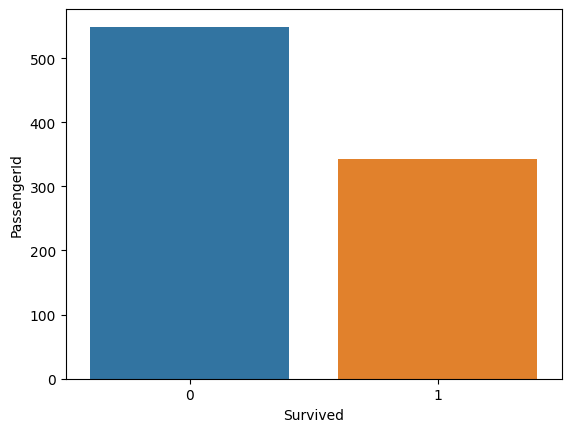

In [ ]:
# a visual for survived and not survived in the titanic
sns.barplot(data = titanic_df, x='Survived',y=titanic_df.groupby('Survived').count()['PassengerId'])


In [ ]:
titanic_df[titanic_df['Survived'] == True].groupby(by='Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,233,233,233,233,197,233,233,233,233,91,231
male,109,109,109,109,93,109,109,109,109,45,109


In [ ]:
print(f"{titanic_df[['Sex','PassengerId']].groupby(by='Sex').count()}")

        PassengerId
Sex                
female          314
male            577


<Axes: xlabel='Sex', ylabel='count'>

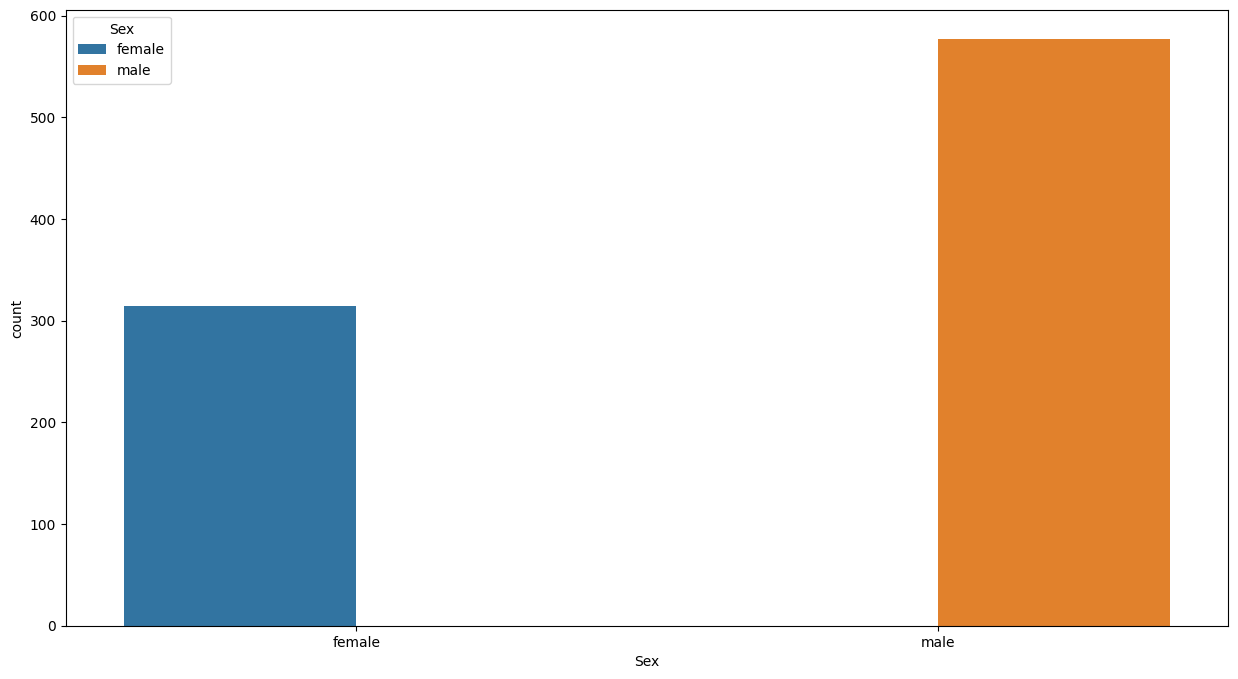

In [ ]:
# a visualization of number women and men in the ship
plt.figure(figsize=(15,8))
sns.countplot(data=titanic_df, x="Sex", hue="Sex")

In [ ]:
# comparison of total male and total female and the survived one for each group
# dt = titanic_df[['Sex','PassengerId','Survived']].groupby(by='Survived').count()
dt = titanic_df[(titanic_df['Survived'] == True)].groupby('Sex', as_index=False).count()
# dt
print(f"{dt['PassengerId'].loc[1]} out of  {titanic_df[titanic_df['Sex'] == 'male'].count()[0]} male survived ")
print(f"{dt['PassengerId'].loc[0]} out of  {titanic_df[titanic_df['Sex'] == 'female'].count()[0]} female survived ")

109 out of  577 male survived 
233 out of  314 female survived 


In [ ]:

dt

,Sex,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,female,233,233,233,233,197,233,233,233,233,91,231
1,male,109,109,109,109,93,109,109,109,109,45,109


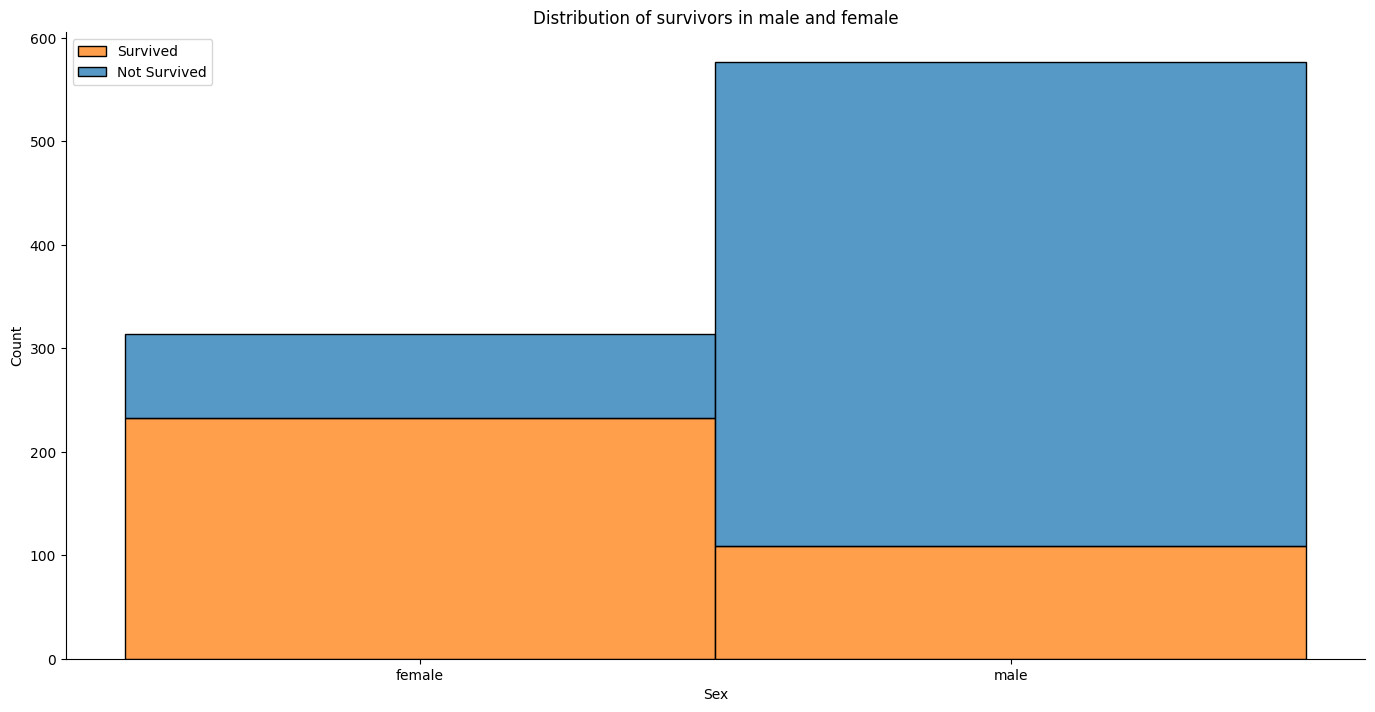

In [ ]:
# create distribution plot to illustrate survival in both male and female
fig = sns.displot(titanic_df, x='Sex', hue='Survived', multiple='stack',height=7, aspect=2)
fig.set(title='Distribution of survivors in male and female')
plt.legend(labels=['Survived', 'Not Survived'])
fig._legend.remove()


In [ ]:
# create a dataframe containing survivors only
# create a pie diagram for the dataset using plotly
survived = titanic_df[titanic_df['Survived'] == True].groupby('Sex', as_index=False).count()
survived

,Sex,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,female,233,233,233,233,197,233,233,233,233,91,231
1,male,109,109,109,109,93,109,109,109,109,45,109


In [ ]:
fig = px.pie(survived, values='Survived', names='Sex', hole=.3,title='Gender % of survivors')
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

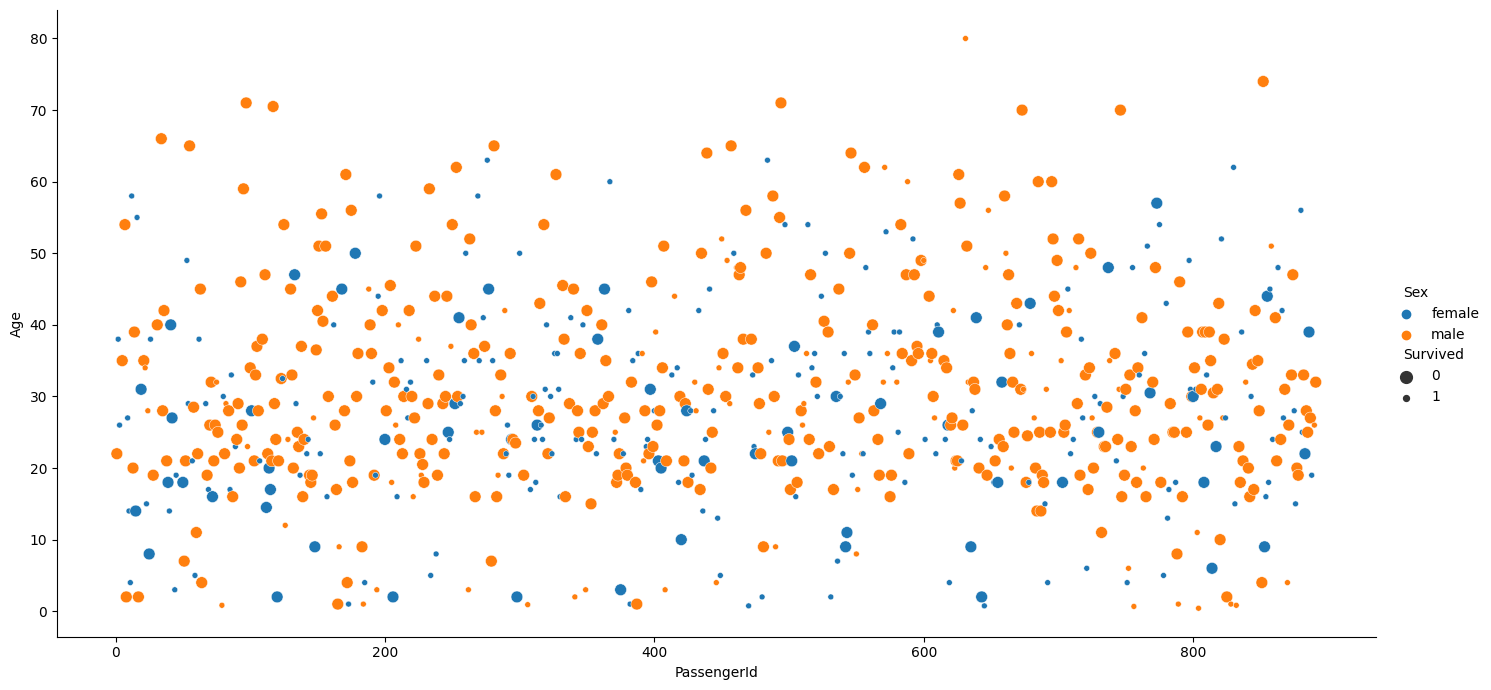

In [ ]:
sns.relplot(titanic_df,x='PassengerId',y='Age',hue='Sex',height=7,aspect=2, size='Survived')

<Axes: xlabel='Age', ylabel='Count'>

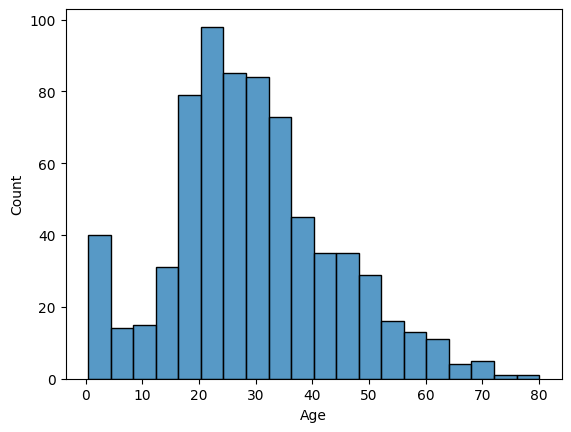

In [ ]:
sns.histplot(titanic_df,x='Age')

In [ ]:
titanic_df[(titanic_df['Pclass'] == 2) & titanic_df['Survived'] == True].count()

PassengerId    87
Survived       87
Pclass         87
Name           87
Sex            87
Age            83
SibSp          87
Parch          87
Ticket         87
Fare           87
Cabin          13
Embarked       87
dtype: int64

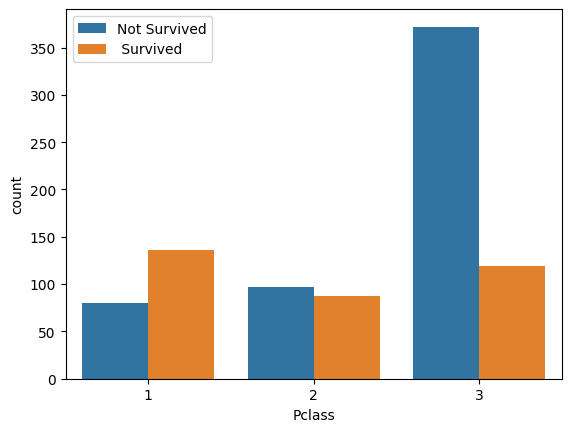

In [ ]:
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')
# sns.relplot(titanic_df, x='Survived', y='Fare', col='Pclass')
# titanic_df.dtypes

fig = sns.countplot(titanic_df, x='Pclass',hue='Survived')
plt.legend(labels=['Not Survived',' Survived'])

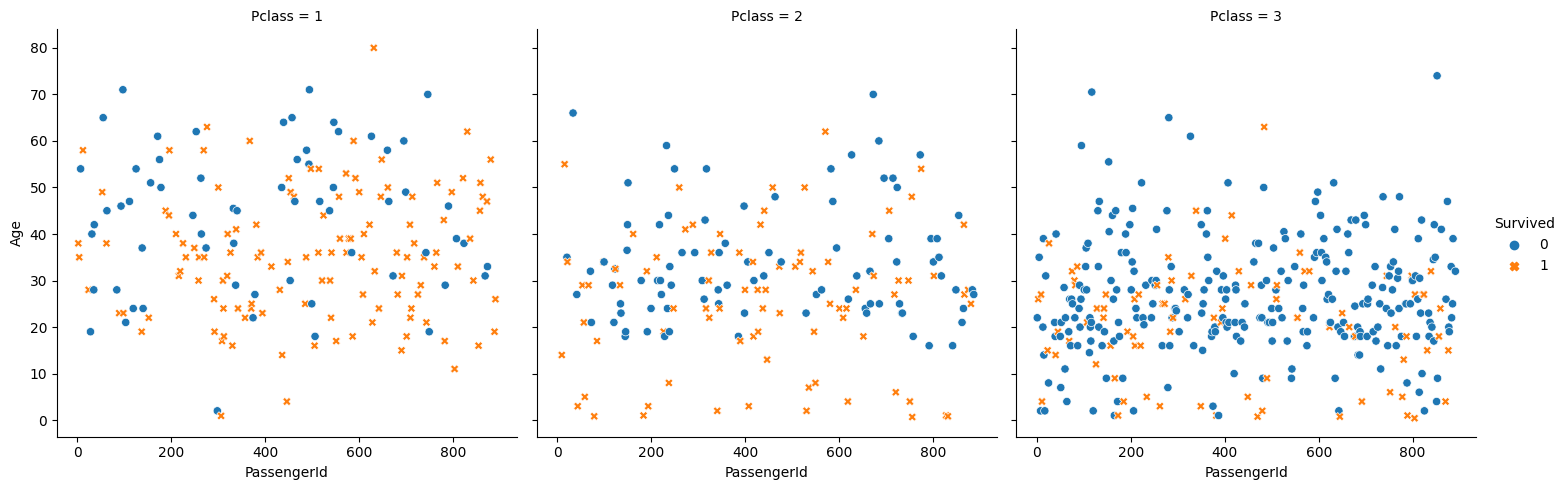

In [ ]:
sns.relplot(titanic_df, x='PassengerId', y='Age',col='Pclass', hue='Survived', style='Survived')

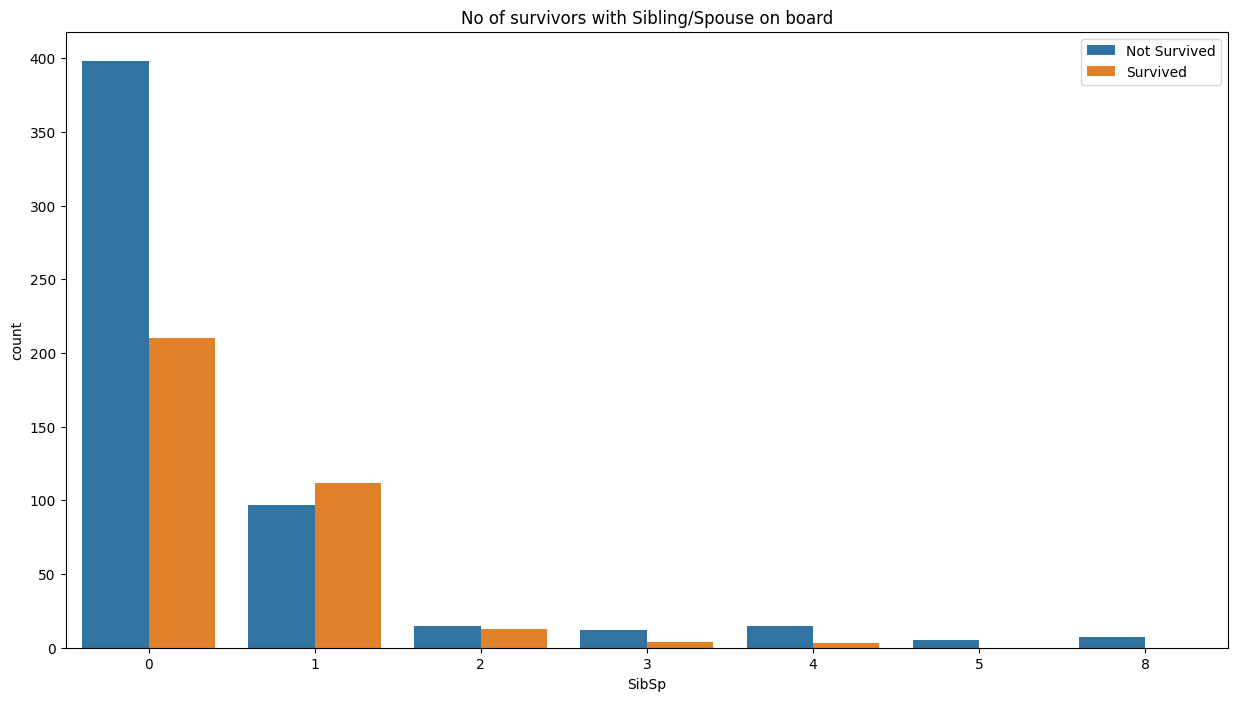

In [ ]:
titanic_df['SibSp'] = titanic_df['SibSp'].astype('category')
plt.figure(figsize=(15,8))
fig= sns.countplot(titanic_df, x='SibSp', hue='Survived')
fig.set(title='No of survivors with Sibling/Spouse on board')
plt.legend(labels=['Not Survived','Survived'])

In [ ]:
titanic_df[(titanic_df['Survived'] == True) & (titanic_df['Age'].isna())].count()

PassengerId    52
Survived       52
Pclass         52
Name           52
Sex            52
Age             0
SibSp          52
Parch          52
Ticket         52
Fare           52
Cabin          11
Embarked       52
dtype: int64

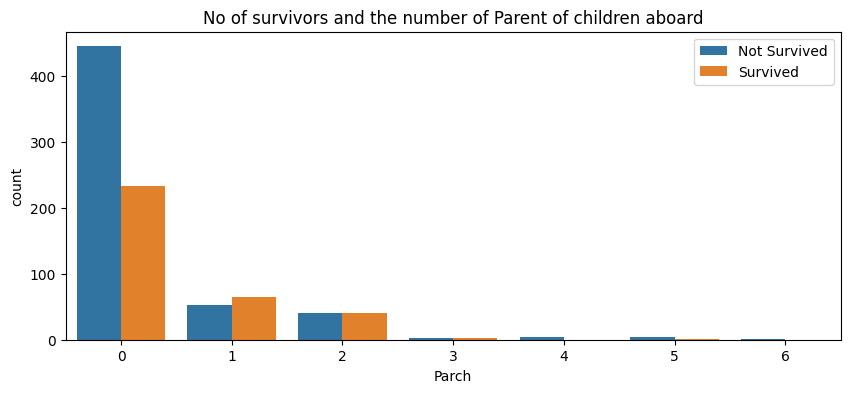

In [ ]:
titanic_df['Parch'] = titanic_df['Parch'].astype('category')
titanic_df.dtypes
plt.figure(figsize=(10,4))

fig = sns.countplot(titanic_df, x='Parch', hue='Survived')
fig.set(title='No of survivors and the number of Parent of children aboard')
plt.legend(labels=['Not Survived', 'Survived'])

[Text(0.5, 1.0, 'No of survivors and the number of Parent of children aboard')]

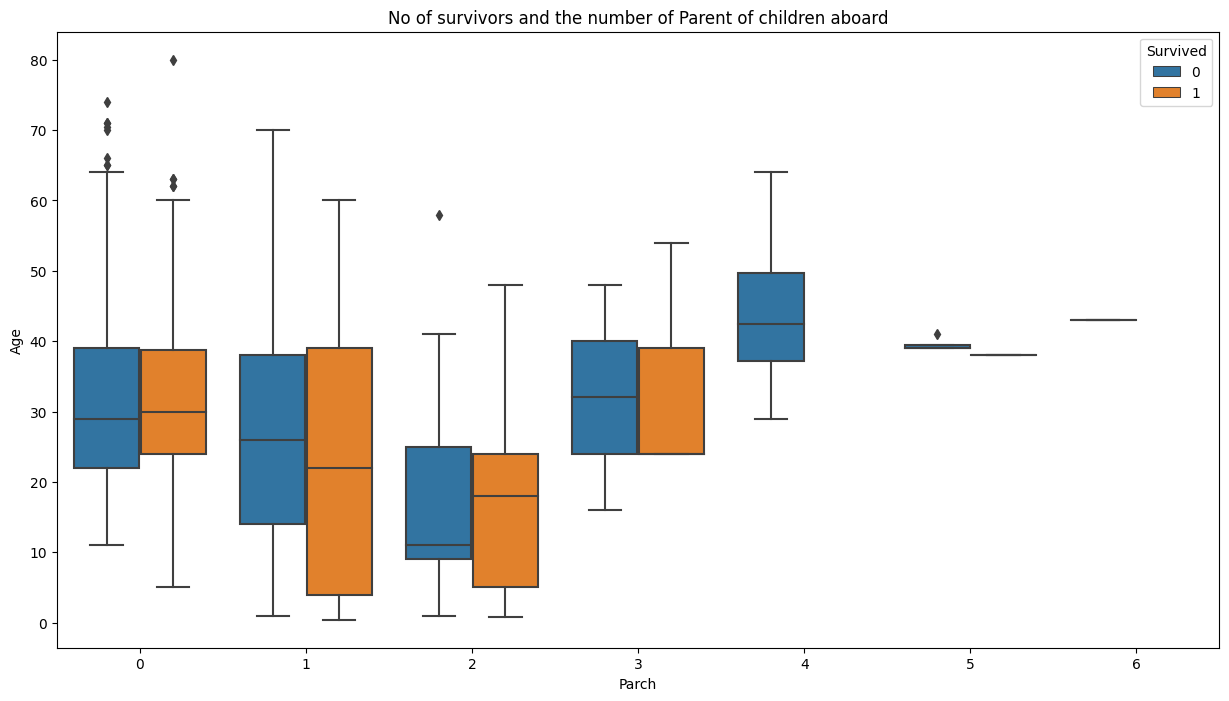

In [ ]:
# titanic_df['Parch'] = titanic_df['Parch'].astype('category')
titanic_df.dtypes
plt.figure(figsize=(15,8))

fig = sns.boxplot(titanic_df, x='Parch',y='Age', hue='Survived')
fig.set(title='No of survivors and the number of Parent of children aboard')
# plt.legend(labels=['Not Survived', 'Survived'])

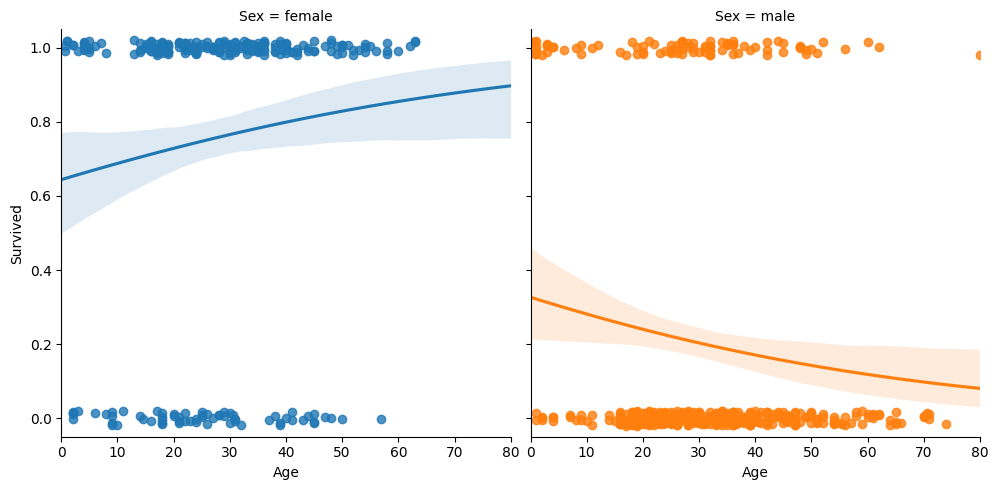

In [ ]:
fig = sns.lmplot(titanic_df, x='Age',y='Survived',hue='Sex',col='Sex', logistic=True,truncate=False,
                 y_jitter=0.02)
fig.set(xlim=(0,80),ylim=(-.05,1.05))


In [ ]:
# sns.lmplot(titanic_df, x='Age', y='Survived', hue='Sex', col='Sex',row='Parch',y_jitter=.03,markers=['o','x'])

<Axes: xlabel='Pclass', ylabel='Age'>

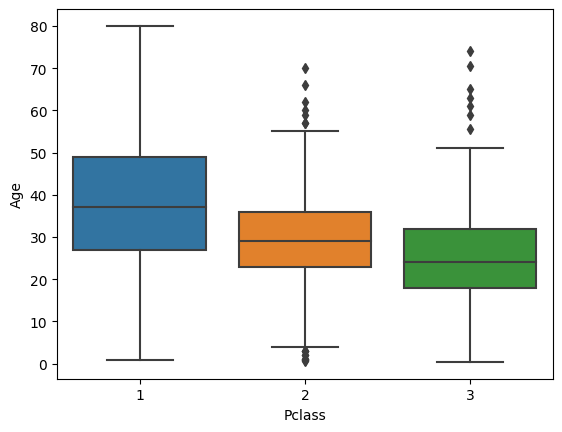

In [ ]:
sns.boxplot(titanic_df, x='Pclass',y='Age')

# Preprocessing

In [21]:
age_by_pclass = titanic_df[['Age','Pclass']].groupby('Pclass',as_index=False).mean()
age_by_pclass

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [22]:
# create a method to fill the null values in Age column depending on the average
# the cabin/pclass
def compute_age(passenger):

  # print(passenger)
  if passenger == 1:
    return int(age_by_pclass.iloc[0]['Age'])
  elif passenger == 2:
    return int(age_by_pclass.iloc[1]['Age'])
  else:
    return int(age_by_pclass.iloc[2]['Age'])


In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
empty_age_df = titanic_df[titanic_df['Age'].isna()]
# for rw in  empty_age_df:
#   rw['Age'] = em
empty_age_df['Age'] = empty_age_df['Pclass'].apply(compute_age)

<ipython-input-24-67327e2f666d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_age_df['Age'] = empty_age_df['Pclass'].apply(compute_age)


In [25]:
empty_age_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,25,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,25,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,25,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,25,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,25,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,25,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,25,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,25,0,0,349217,7.8958,NaN,S


In [26]:
titanic_df.dropna(subset=['Age'],inplace=True)
titanic_df['Age'].isna().any()

False

In [28]:
combined_df = pd.concat([titanic_df,empty_age_df])

In [38]:
combined_df.drop(columns=['Cabin'], inplace=True)

In [39]:
combined_df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

# **Model Training**

Train your model first using the LogisticRegression algorithm first, it suited for binary problems i.e True or False data.
In our case we would like to predict the survival problem which is a Yes or No to solve it.
Logistic Regression is used to predict outcome based off a True or False.

In [46]:
# dropna values
clean_data = combined_df.dropna()
clean_data.reset_index(drop=True, inplace=True)
# reset the index after dropna
# drop columns which are strings or convert them to 0/1 example the embarked
clean_data.drop(['Name','Ticket'],axis=1,inplace=True)
clean_data.head()
# pd.concat(clean_data,pd.get_dummies(clean_data['Sex']),ignore_index=True)
# clean_data.append(pd.get_dummies(clean_data['Sex']))
clean_data.shape

<ipython-input-46-f938529cfb0f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(['Name','Ticket'],axis=1,inplace=True)


(889, 9)

In [47]:
embark = pd.get_dummies(clean_data['Embarked']).reset_index(drop=True)
clean_data = clean_data.join(embark)

In [48]:
# pclass = pd.get_dummies(clean_data['Pclass']).reset_index(drop=True)
# clean_data = clean_data.join(pclass)

In [49]:
gender = pd.get_dummies(clean_data['Sex']).reset_index(drop=True)
new_data = pd.merge(gender,clean_data,left_index=True, right_index=True)
new_data.drop(['Sex','Embarked','PassengerId','Fare','C','Q','S'],axis=1,inplace=True)
new_data

,female,male,Survived,Pclass,Age,SibSp,Parch
0,0,1,0,3,22.0,1,0
1,1,0,1,1,38.0,1,0
2,1,0,1,3,26.0,0,0
3,1,0,1,1,35.0,1,0
4,0,1,0,3,35.0,0,0
...,...,...,...,...,...,...,...
884,0,1,0,3,25.0,0,0
885,1,0,0,3,25.0,8,2
886,0,1,0,3,25.0,0,0
887,0,1,0,3,25.0,0,0


In [50]:
new_data.columns = new_data.columns.astype(str)

Logistic Regression model

In [51]:
X =  new_data.drop('Survived',axis=1)
y = new_data['Survived']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
Lr = LogisticRegression()
Lr.fit(X_train, y_train)
# print(Lr.coef_, Lr.intercept_)


LogisticRegression()

In [52]:
Lr.score(X,y)

0.8200224971878515

In [53]:
# predict_X = pd.DataFrame(new_data.drop('Survived',axis=1)[-50:])
y_predictions = Lr.predict(X_test)

# predict_X.values.ravel()
y_predictions

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_predictions))
print(accuracy_score(y_test,y_predictions))
print(classification_report(y_test,y_predictions))

[[192  32]
 [ 39  93]]
0.800561797752809
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       224
           1       0.74      0.70      0.72       132

    accuracy                           0.80       356
   macro avg       0.79      0.78      0.78       356
weighted avg       0.80      0.80      0.80       356



In [56]:
# add features to the model to try and increase its prediction
# convert the other columns to Int values i.e True or False
# use pandas.get_dummies() , convert the categorical data into O/1